# RecipeClassification


## Identifying Which feature is best to classify Recipe Dataset

### Importing necessary libraries

###### The following code is written in Python 3.x. Libraries provide pre-written functionally to perform necessary tasks

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [144]:
#reading the data
recipe = pd.read_csv('D:/Manjiri/Internshala_Sonu/Data/recipe_classification.csv')

In [145]:
#print number of rows and number of columns of data
recipe.shape

(558, 9)

In [146]:
#printing top 6 rows 
recipe.head(6)

,Unnamed: 0,Recipe_name,Category,Cuisine,Preptime,Tottime,Yield,Serving_size,Nutrition
0,1,Banana Flambe Recipe,Dessert,European,5,10,2 Servings,1 bowl,380
1,4,Greek Cheese Balls Recipe,Snack,European,10,20,8 Servings,1 bowl,632
2,5,Banana Flambe Recipe,Dessert,European,5,10,2 Servings,1 bowl,380
3,8,Greek Cheese Balls Recipe,Snack,European,10,20,8 Servings,1 bowl,632
4,9,Misal Pav Recipe,Lunch,Indian,10,30,8 Servings,1 bowl,316
5,10,Oreo Cake Recipe,Dessert,European,10,15,5 Servings,1 bowl,485


In [147]:
#Check Missing Values
recipe.isnull().sum()

Unnamed: 0      0
Recipe_name     0
Category        0
Cuisine         0
Preptime        0
Tottime         0
Yield           0
Serving_size    0
Nutrition       0
dtype: int64

In [148]:
#Removing one column name is'Unnamed :0'
recipe.drop(['Unnamed: 0'], axis = 1, inplace=True)

Here, I am removing uncessary column with drop function. The resulting dataframe will have 8 columns out of 9. The column containing 'unnamed' variable will be removed.

### Check Numeric and Categorical Features

A dataset consists of numerical and categorical columns.

Looking at the dataset, I can identify the categorical and continuous columns in it.But it might also be possible that the numerical values are represented as strings in some feature. Or the categorical values in some features might be represented as some other datatypes instead of strings. I will be going to check for the datatypes of all the features.

In [149]:
#Identifying Numeric Features
numeric_data = recipe.select_dtypes(include=np.number) # select_dtypes select data with numeric features
numeric_col = numeric_data.columns  # we will store the numeric features in a variable
print("Numeric Features:")
print(numeric_data.head())
print("==="*20)

Numeric Features:
   Preptime  Tottime
0         5       10
1        10       20
2         5       10
3        10       20
4        10       30


In [150]:
#Identifying Categorical Features
categorical_data = recipe.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns  # we will store the categorical features in a variable
print("Categorical Features:")
print(categorical_data.head())
print("==="*20)

Categorical Features:
                 Recipe_name Category   Cuisine       Yield Serving_size  \
0       Banana Flambe Recipe  Dessert  European  2 Servings       1 bowl   
1  Greek Cheese Balls Recipe    Snack  European  8 Servings       1 bowl   
2       Banana Flambe Recipe  Dessert  European  2 Servings       1 bowl   
3  Greek Cheese Balls Recipe    Snack  European  8 Servings       1 bowl   
4           Misal Pav Recipe    Lunch    Indian  8 Servings       1 bowl   

  Nutrition  
0       380  
1       632  
2       380  
3       632  
4       316  


In [151]:
#CHECK THE DATATYPES OF ALL COLUMNS:

print(recipe.dtypes)

Recipe_name     object
Category        object
Cuisine         object
Preptime         int64
Tottime          int64
Yield           object
Serving_size    object
Nutrition       object
dtype: object


### Check for Class Imabalance

Class imbalance occurs when the observation belonging to one class in the target are significantly higher than the other class or classes.This dataset is multi-class distribution problem.
Since most machine learning algorithms assume that the data is equally distributed, applying them on imbalance data often results in bias towards majority classes and poor classification of minority classes. Hence it's need to identify and deal with Class Imbalance.

In [152]:
# we are finding the percentage of each class in the feature 'Cuisine'
class_values = (recipe['Cuisine'].value_counts()/recipe['Cuisine'].value_counts().sum())*100
print(class_values)

Indian      67.204301
European    22.222222
American     6.093190
Chinese      4.480287
Name: Cuisine, dtype: float64


In [153]:
# we are finding the percentage of each class in the feature 'Cuisine'
class_values = (recipe['Category'].value_counts()/recipe['Category'].value_counts().sum())*100
print(class_values)

Lunch        29.211470
Snack        24.372760
Dessert      22.580645
Dinner       11.648746
Breakfast    10.752688
Salads        1.433692
Name: Category, dtype: float64


In [154]:
# we are finding the percentage of each class in the feature 'Cuisine'
class_values = (recipe['Yield'].value_counts()/recipe['Yield'].value_counts().sum())*100
print(class_values)

4 Servings     29.032258
2 Servings     17.025090
6 Servings     12.186380
8 Servings     10.035842
5 Servings      9.856631
3 Servings      8.422939
10 Servings     5.913978
1 Servings      2.329749
7 Servings      2.150538
12 Servings     1.075269
20 Servings     0.896057
9 Servings      0.358423
15 Servings     0.358423
80M             0.179211
13 Servings     0.179211
Name: Yield, dtype: float64


#### Observations:

The Class Distribution in 'Cuisine' feature is ~67:22:6:4 for Indian,European,American & Chinese Classes. This is clear indication of imbalance.
The Class Distribution in 'Category' feature is ~29:24:22:11:10:1. It is quite imbalance.
Even 'Yield' feature is also imbalanced.
Now, I will be going to identify which feature is best suitable to classify recipe dataset.

### Univariate Analysis of Categorical Variable

Univariate Analysis means analysis of single variable. It's mainly describe the characteristics of the variable.
'Recipe_Name', 'Nutrition' have too many classes.This features are not suitable for classification.

Text(0.5, 1.0, 'Recipe_Cuisine')

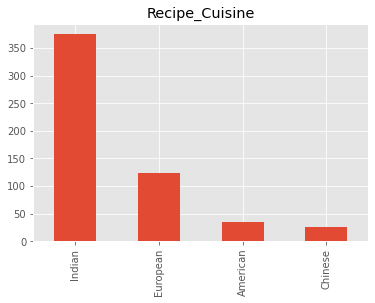

In [155]:
recipe['Cuisine'].value_counts().plot.bar()
plt.title('Recipe_Cuisine')

Text(0.5, 1.0, 'Recipe_Category')

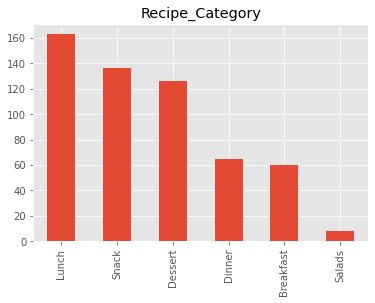

In [156]:
recipe['Category'].value_counts().plot.bar()
plt.title('Recipe_Category')

Text(0.5, 1.0, 'Recipe_Yield')

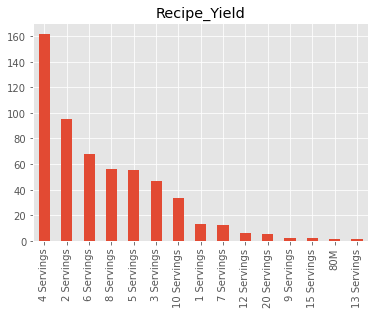

In [157]:
#Creating frequency table for Categorical Variable 'Yield'
recipe['Yield'].value_counts().plot.bar()
plt.title('Recipe_Yield')

#### Observations:

From the above visuals, we can make the following observations.

Most recipes belong to Indian Cuisine.There are least Chinese recipes in a dataset.

Lunch, Snacks and Dessert recipes are more compared to dinner, breakfast and salads.

Percentage of yield 4 serving is high compared to other classes. Majority recipes will serve four number of people.

### Univariate Analysis of Continuous Variable

By performing the univariate analysis of Continuous variable, we can get sense of the distribution values in every column and of the outlier in the data.

Text(0.5, 1.0, 'Recipe_Preptime')

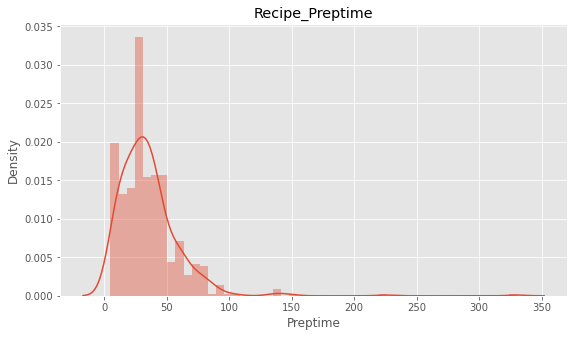

In [158]:
#Plotting 'histogram' for the 'Preptime' Variable
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(recipe['Preptime'])
plt.title('Recipe_Preptime')

Text(0.5, 1.0, 'Recipe_Tottime')

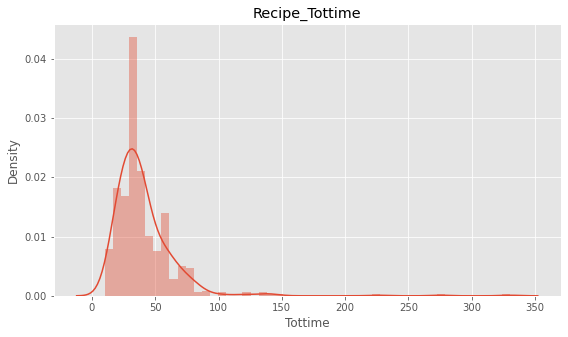

In [159]:
#Plotting 'histogram' for the 'Tottime' Variable
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(recipe['Tottime'])
plt.title('Recipe_Tottime')

### Categorical - Continuous Bivariate Analysis

Text(0.5, 1.0, 'Cuisine Vs Preptime')

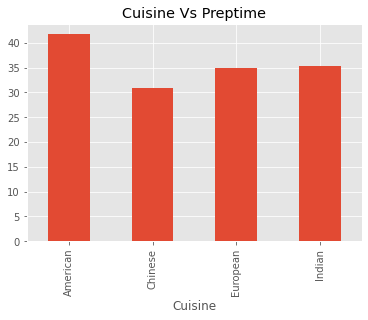

In [160]:
recipe.groupby('Cuisine')['Preptime'].mean().plot.bar()
plt.title('Cuisine Vs Preptime')

Text(0.5, 1.0, 'Category Vs Preptime')

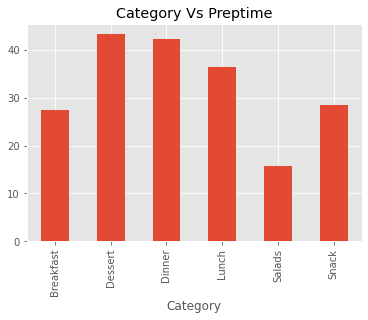

In [161]:
recipe.groupby('Category')['Preptime'].mean().plot.bar()
plt.title('Category Vs Preptime')

#### Observations:

More time is required to prepare American recipes. While less time is required to cook Chinese recipes.
However, Salad recipes are really required less time to prepare while as desserts required more time.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

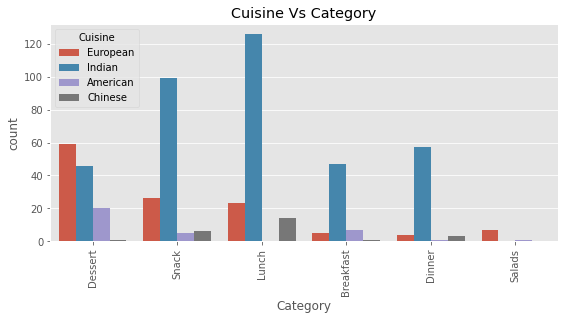

In [162]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=recipe['Category'],hue=recipe['Cuisine'],data=recipe)
plt.title('Cuisine Vs Category')    
plt.xticks(rotation=90)

#### Observation:

From the above Visual understanding, there are many Lunch recipes belong to Indian Cuisine. Most of the salad recipes are Europian Cuisine.

#### Univariate Outlier Detection

Boxplots are the best choice for visualizing outliers.

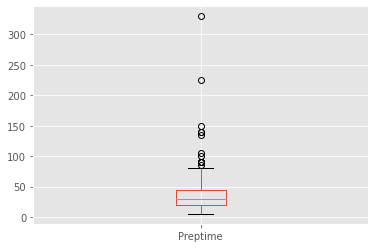

In [163]:
#Creating 'Preptime' box plot
recipe['Preptime'].plot.box()

#### Bivariate Outlier Detection

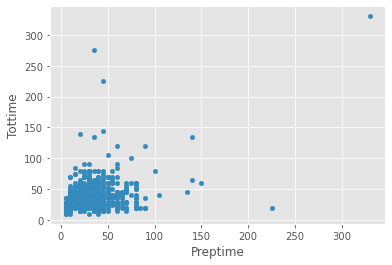

In [164]:
recipe.plot.scatter('Preptime','Tottime')

### Removing outliers from the Dataset

In [165]:
recipe = recipe[recipe['Preptime']<150]

In [166]:
recipe.shape

(555, 8)

### Replacing Outliers in 'Preptime' with the mean 'Preptime'

In [167]:
recipe.loc[recipe['Preptime']>100,'Preptime']=np.mean(recipe['Preptime'])

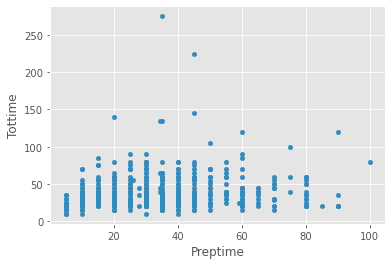

In [168]:
recipe.plot.scatter('Preptime','Tottime')

Here, I have completed Exploratory Data Analyis. From the observations, I found that Some features have high cardinality.
This is Multiclass Classification Problem. Only 'Cuisine' and 'Category' feature is suitable for Classification.